In [1]:
import math
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy import optimize as opt
import matplotlib.pyplot as plt

In [2]:
bond_data = pd.read_excel('hw_2_data.xlsx')
bond_data

Maturity   Coupon   Price
0  2019-08-15  0.08125  102.79
1  2020-02-15  0.08500  105.88
2  2020-08-15  0.08750  109.10
3  2021-02-15  0.07875  110.43
4  2021-08-15  0.08125  113.57
5  2022-02-15  0.02500  100.16
6  2022-08-15  0.07250  115.87
7  2023-02-15  0.07125  117.60
8  2023-08-15  0.06250  115.97
9  2024-02-15  0.02750  101.34
10 2024-08-15  0.02375   99.42
11 2025-02-15  0.07625  128.22
12 2025-08-15  0.06875  125.78
13 2026-02-15  0.06000  121.93
14 2026-08-15  0.06750  128.42
15 2027-02-15  0.06625  129.04
16 2027-08-15  0.06375  128.48
17 2028-02-15  0.02750  100.92
18 2028-08-15  0.05500  123.76
19 2029-02-15  0.05250  122.56
20 2029-08-15  0.06125  131.49
21 2031-02-15  0.05375  127.31
22 2036-02-15  0.04500  123.67
23 2037-02-15  0.04750  127.90
24 2038-02-15  0.04375  122.98
25 2039-02-15  0.03500  109.84
26 2039-08-15  0.04500  125.20
27 2040-02-15  0.04625  127.39
28 2040-08-15  0.03875  115.38
29 2041-02-15  0.04750  129.72
30 2041-08-15  0.03750  113.35
31 2042-02-15  0.03125  102.87
32 2042-08-15  0.02750   96.30
33 2043-02-15  0.03125  102.54
34 2043-08-15  0.03625  111.20
35 2044-02-15  0.03625  111.35
36 2044-08-15  0.03125  102.65
37 2045-02-15  0.02500   91.19
38 2045-08-15  0.02875   97.96
39 2046-02-15  0.02500   90.84
40 2046-08-15  0.02250   85.99
41 2047-02-15  0.03000  100.32
42 2047-08-15  0.02750   95.25
43 2048-02-15  0.03000   99.98
44 2048-08-15  0.03000   99.98

# Question 1, calculate yield

we know that if yield is $r$, then the bond price is 
$$\textbf{price} = \frac{c}{r} + (1-\frac{c}{r})(1 + \frac{r}{k})^{-kN},$$
assuming face value = $1, where here k = 2.

In [4]:
days_to_mature = np.zeros(len(bond_data))

for i in range(len(bond_data)):
    days_to_mature[i] = (bond_data["Maturity"][i]-pd.to_datetime("2/15/2019")).days


days_to_mature = np.round(days_to_mature*2/365)/2

# calculate the number of years till maturity
bond_data["N"] = days_to_mature


In [5]:
def price_func(r, args):
    # define a function whose input is the yield r
    # the root to the function is the correct yield s.t. the bond is correctly priced
    c, k, N, price = args
    return (c/r + (1-c/r)*(1+r/k)**(-k*N))*100 - price

yields_to_mature = np.zeros(len(bond_data))

# we use a solver to solve for the yield that correctly prices each bond
for i in range(len(bond_data)):
    yields_to_mature[i] = opt.fsolve(price_func, 0.03, args = [bond_data["Coupon"][i], 2, bond_data["N"][i], bond_data["Price"][i]])[0]


bond_data["Yield"] = yields_to_mature

bond_data

Maturity   Coupon   Price     N     Yield
0  2019-08-15  0.08125  102.79   0.5  0.024759
1  2020-02-15  0.08500  105.88   1.0  0.025091
2  2020-08-15  0.08750  109.10   1.5  0.025292
3  2021-02-15  0.07875  110.43   2.0  0.024963
4  2021-08-15  0.08125  113.57   2.5  0.024924
5  2022-02-15  0.02500  100.16   3.0  0.024444
6  2022-08-15  0.07250  115.87   3.5  0.024874
7  2023-02-15  0.07125  117.60   4.0  0.024763
8  2023-08-15  0.06250  115.97   4.5  0.024777
9  2024-02-15  0.02750  101.34   5.0  0.024635
10 2024-08-15  0.02375   99.42   5.5  0.024885
11 2025-02-15  0.07625  128.22   6.0  0.025266
12 2025-08-15  0.06875  125.78   6.5  0.025464
13 2026-02-15  0.06000  121.93   7.0  0.025583
14 2026-08-15  0.06750  128.42   7.5  0.025610
15 2027-02-15  0.06625  129.04   8.0  0.025836
16 2027-08-15  0.06375  128.48   8.5  0.026163
17 2028-02-15  0.02750  100.92   9.0  0.026345
18 2028-08-15  0.05500  123.76   9.5  0.026540
19 2029-02-15  0.05250  122.56  10.0  0.026651
20 2029-08-15  0.06125  131.49  10.5  0.026667
21 2031-02-15  0.05375  127.31  12.0  0.026960
22 2036-02-15  0.04500  123.67  17.0  0.027478
23 2037-02-15  0.04750  127.90  18.0  0.027710
24 2038-02-15  0.04375  122.98  19.0  0.028063
25 2039-02-15  0.03500  109.84  20.0  0.028511
26 2039-08-15  0.04500  125.20  20.5  0.028659
27 2040-02-15  0.04625  127.39  21.0  0.028780
28 2040-08-15  0.03875  115.38  21.5  0.029079
29 2041-02-15  0.04750  129.72  22.0  0.029111
30 2041-08-15  0.03750  113.35  22.5  0.029351
31 2042-02-15  0.03125  102.87  23.0  0.029522
32 2042-08-15  0.02750   96.30  23.5  0.029698
33 2043-02-15  0.03125  102.54  24.0  0.029762
34 2043-08-15  0.03625  111.20  24.5  0.029778
35 2044-02-15  0.03625  111.35  25.0  0.029780
36 2044-08-15  0.03125  102.65  25.5  0.029760
37 2045-02-15  0.02500   91.19  26.0  0.029898
38 2045-08-15  0.02875   97.96  26.5  0.029870
39 2046-02-15  0.02500   90.84  27.0  0.029973
40 2046-08-15  0.02250   85.99  27.5  0.030020
41 2047-02-15  0.03000  100.32  28.0  0.029831
42 2047-08-15  0.02750   95.25  28.5  0.029991
43 2048-02-15  0.03000   99.98  29.0  0.030010
44 2048-08-15  0.03000   99.98  29.5  0.030010

The yield here is already stated in semi-annual compounding, since $k=2.$

# Question 2 Calculate MacD

In [6]:
# function to calculate MacD for a bond
def get_MacD(N, r, k, c_i):
    # N is the number of years
    # r is yield
    # k is the number of payments per year
    # c_i is an array with k*N elements, payment at each period
    
    # the periods are given by np.linspace(1/k, N, kN)
    
    periods = np.linspace(1/k, N, int(np.round(k*N)))
    # a total of kN payments
    
    numer = 0
    denom = 0

    for i in range(len(periods)):
        numer += periods[i] * c_i[i] * (1+r/k)**(-(i+1))
        denom += c_i[i] * (1+r/k)**(-(i+1))

    return numer/denom


def generate_payments(c, k, N):
    # this function returns an array which is the payments for a bond till maturity
    # c is coupon rate per year
    # k is periods of compounding per year
    # N is years to maturity
    # assuming face value $100
    
    payments = np.ones(int(np.round(k*N)))*(c/k)*100
    payments[-1] += 100
    return payments


MacD = np.zeros(len(bond_data))
for i in range(len(bond_data)):
    payments = generate_payments(bond_data["Coupon"][i], 2, bond_data["N"][i])
    MacD[i] = get_MacD(bond_data["N"][i], bond_data["Yield"][i], 2, payments)
    
bond_data["MacD"] = MacD
bond_data


Maturity   Coupon   Price     N     Yield       MacD
0  2019-08-15  0.08125  102.79   0.5  0.024759   0.500000
1  2020-02-15  0.08500  105.88   1.0  0.025091   0.980179
2  2020-08-15  0.08750  109.10   1.5  0.025292   1.440847
3  2021-02-15  0.07875  110.43   2.0  0.024963   1.895216
4  2021-08-15  0.08125  113.57   2.5  0.024924   2.325508
5  2022-02-15  0.02500  100.16   3.0  0.024444   2.909005
6  2022-08-15  0.07250  115.87   3.5  0.024874   3.182104
7  2023-02-15  0.07125  117.60   4.0  0.024763   3.591172
8  2023-08-15  0.06250  115.97   4.5  0.024777   4.034328
9  2024-02-15  0.02750  101.34   5.0  0.024635   4.708010
10 2024-08-15  0.02375   99.42   5.5  0.024885   5.187241
11 2025-02-15  0.07625  128.22   6.0  0.025266   5.070203
12 2025-08-15  0.06875  125.78   6.5  0.025464   5.494575
13 2026-02-15  0.06000  121.93   7.0  0.025583   5.948596
14 2026-08-15  0.06750  128.42   7.5  0.025610   6.209576
15 2027-02-15  0.06625  129.04   8.0  0.025836   6.566283
16 2027-08-15  0.06375  128.48   8.5  0.026163   6.937563
17 2028-02-15  0.02750  100.92   9.0  0.026345   8.039243
18 2028-08-15  0.05500  123.76   9.5  0.026540   7.757165
19 2029-02-15  0.05250  122.56  10.0  0.026651   8.141978
20 2029-08-15  0.06125  131.49  10.5  0.026667   8.276371
21 2031-02-15  0.05375  127.31  12.0  0.026960   9.387374
22 2036-02-15  0.04500  123.67  17.0  0.027478  12.623016
23 2037-02-15  0.04750  127.90  18.0  0.027710  13.031654
24 2038-02-15  0.04375  122.98  19.0  0.028063  13.744910
25 2039-02-15  0.03500  109.84  20.0  0.028511  14.835856
26 2039-08-15  0.04500  125.20  20.5  0.028659  14.408155
27 2040-02-15  0.04625  127.39  21.0  0.028780  14.571620
28 2040-08-15  0.03875  115.38  21.5  0.029079  15.302279
29 2041-02-15  0.04750  129.72  22.0  0.029111  14.953024
30 2041-08-15  0.03750  113.35  22.5  0.029351  15.876607
31 2042-02-15  0.03125  102.87  23.0  0.029522  16.676837
32 2042-08-15  0.02750   96.30  23.5  0.029698  17.326517
33 2043-02-15  0.03125  102.54  24.0  0.029762  17.158239
34 2043-08-15  0.03625  111.20  24.5  0.029778  16.904373
35 2044-02-15  0.03625  111.35  25.0  0.029780  17.133079
36 2044-08-15  0.03125  102.65  25.5  0.029760  17.875191
37 2045-02-15  0.02500   91.19  26.0  0.029898  18.897408
38 2045-08-15  0.02875   97.96  26.5  0.029870  18.630819
39 2046-02-15  0.02500   90.84  27.0  0.029973  19.376420
40 2046-08-15  0.02250   85.99  27.5  0.030020  20.013626
41 2047-02-15  0.03000  100.32  28.0  0.029831  19.151754
42 2047-08-15  0.02750   95.25  28.5  0.029991  19.696393
43 2048-02-15  0.03000   99.98  29.0  0.030010  19.565873
44 2048-08-15  0.03000   99.98  29.5  0.030010  19.776677

# Question 3 Calculate ModD

We know that 
$$ \textbf{ModD} = \frac{\textbf{MacD}}{1+\frac{r}{k}},$$
where $r$ is annualized yield, $k$ is periods of compounding per year.

In [7]:
bond_data["ModD"] = bond_data["MacD"]/(1+bond_data["Yield"]/2)
bond_data

Maturity   Coupon   Price     N     Yield       MacD       ModD
0  2019-08-15  0.08125  102.79   0.5  0.024759   0.500000   0.493886
1  2020-02-15  0.08500  105.88   1.0  0.025091   0.980179   0.968034
2  2020-08-15  0.08750  109.10   1.5  0.025292   1.440847   1.422853
3  2021-02-15  0.07875  110.43   2.0  0.024963   1.895216   1.871853
4  2021-08-15  0.08125  113.57   2.5  0.024924   2.325508   2.296884
5  2022-02-15  0.02500  100.16   3.0  0.024444   2.909005   2.873881
6  2022-08-15  0.07250  115.87   3.5  0.024874   3.182104   3.143015
7  2023-02-15  0.07125  117.60   4.0  0.024763   3.591172   3.547251
8  2023-08-15  0.06250  115.97   4.5  0.024777   4.034328   3.984960
9  2024-02-15  0.02750  101.34   5.0  0.024635   4.708010   4.650725
10 2024-08-15  0.02375   99.42   5.5  0.024885   5.187241   5.123493
11 2025-02-15  0.07625  128.22   6.0  0.025266   5.070203   5.006951
12 2025-08-15  0.06875  125.78   6.5  0.025464   5.494575   5.425497
13 2026-02-15  0.06000  121.93   7.0  0.025583   5.948596   5.873465
14 2026-08-15  0.06750  128.42   7.5  0.025610   6.209576   6.131068
15 2027-02-15  0.06625  129.04   8.0  0.025836   6.566283   6.482540
16 2027-08-15  0.06375  128.48   8.5  0.026163   6.937563   6.847982
17 2028-02-15  0.02750  100.92   9.0  0.026345   8.039243   7.934723
18 2028-08-15  0.05500  123.76   9.5  0.026540   7.757165   7.655577
19 2029-02-15  0.05250  122.56  10.0  0.026651   8.141978   8.034908
20 2029-08-15  0.06125  131.49  10.5  0.026667   8.276371   8.167470
21 2031-02-15  0.05375  127.31  12.0  0.026960   9.387374   9.262514
22 2036-02-15  0.04500  123.67  17.0  0.027478  12.623016  12.451936
23 2037-02-15  0.04750  127.90  18.0  0.027710  13.031654  12.853570
24 2038-02-15  0.04375  122.98  19.0  0.028063  13.744910  13.554718
25 2039-02-15  0.03500  109.84  20.0  0.028511  14.835856  14.627338
26 2039-08-15  0.04500  125.20  20.5  0.028659  14.408155  14.204608
27 2040-02-15  0.04625  127.39  21.0  0.028780  14.571620  14.364907
28 2040-08-15  0.03875  115.38  21.5  0.029079  15.302279  15.082983
29 2041-02-15  0.04750  129.72  22.0  0.029111  14.953024  14.738494
30 2041-08-15  0.03750  113.35  22.5  0.029351  15.876607  15.646976
31 2042-02-15  0.03125  102.87  23.0  0.029522  16.676837  16.434250
32 2042-08-15  0.02750   96.30  23.5  0.029698  17.326517  17.072996
33 2043-02-15  0.03125  102.54  24.0  0.029762  17.158239  16.906655
34 2043-08-15  0.03625  111.20  24.5  0.029778  16.904373  16.656380
35 2044-02-15  0.03625  111.35  25.0  0.029780  17.133079  16.881711
36 2044-08-15  0.03125  102.65  25.5  0.029760  17.875191  17.613111
37 2045-02-15  0.02500   91.19  26.0  0.029898  18.897408  18.619068
38 2045-08-15  0.02875   97.96  26.5  0.029870  18.630819  18.356664
39 2046-02-15  0.02500   90.84  27.0  0.029973  19.376420  19.090327
40 2046-08-15  0.02250   85.99  27.5  0.030020  20.013626  19.717668
41 2047-02-15  0.03000  100.32  28.0  0.029831  19.151754  18.870298
42 2047-08-15  0.02750   95.25  28.5  0.029991  19.696393  19.405400
43 2048-02-15  0.03000   99.98  29.0  0.030010  19.565873  19.276623
44 2048-08-15  0.03000   99.98  29.5  0.030010  19.776677  19.484312

# Question 4 Compute the price of bonds if yield goes up or down by 0.5%

We know the formula for pricing a bond is 
$$\textbf{price} = \frac{c}{r} + (1-\frac{c}{r})(1+\frac{r}{k})^{-kN},$$
where we assume face value is $1.

In [9]:
def get_bond_price(c, r, k, N):
    return 100 * (c/r + (1 - c/r) * (1+r/k)**(-k*N))

bond_data["pr_r_up_0.005"] = get_bond_price(bond_data["Coupon"], bond_data["Yield"]+0.005, 2, bond_data["N"])
bond_data["pr_r_down_0.005"] = get_bond_price(bond_data["Coupon"], bond_data["Yield"]-0.005, 2, bond_data["N"])
bond_data

Maturity   Coupon   Price     N     Yield       MacD       ModD  \
0  2019-08-15  0.08125  102.79   0.5  0.024759   0.500000   0.493886   
1  2020-02-15  0.08500  105.88   1.0  0.025091   0.980179   0.968034   
2  2020-08-15  0.08750  109.10   1.5  0.025292   1.440847   1.422853   
3  2021-02-15  0.07875  110.43   2.0  0.024963   1.895216   1.871853   
4  2021-08-15  0.08125  113.57   2.5  0.024924   2.325508   2.296884   
5  2022-02-15  0.02500  100.16   3.0  0.024444   2.909005   2.873881   
6  2022-08-15  0.07250  115.87   3.5  0.024874   3.182104   3.143015   
7  2023-02-15  0.07125  117.60   4.0  0.024763   3.591172   3.547251   
8  2023-08-15  0.06250  115.97   4.5  0.024777   4.034328   3.984960   
9  2024-02-15  0.02750  101.34   5.0  0.024635   4.708010   4.650725   
10 2024-08-15  0.02375   99.42   5.5  0.024885   5.187241   5.123493   
11 2025-02-15  0.07625  128.22   6.0  0.025266   5.070203   5.006951   
12 2025-08-15  0.06875  125.78   6.5  0.025464   5.494575   5.425497   
13 2026-02-15  0.06000  121.93   7.0  0.025583   5.948596   5.873465   
14 2026-08-15  0.06750  128.42   7.5  0.025610   6.209576   6.131068   
15 2027-02-15  0.06625  129.04   8.0  0.025836   6.566283   6.482540   
16 2027-08-15  0.06375  128.48   8.5  0.026163   6.937563   6.847982   
17 2028-02-15  0.02750  100.92   9.0  0.026345   8.039243   7.934723   
18 2028-08-15  0.05500  123.76   9.5  0.026540   7.757165   7.655577   
19 2029-02-15  0.05250  122.56  10.0  0.026651   8.141978   8.034908   
20 2029-08-15  0.06125  131.49  10.5  0.026667   8.276371   8.167470   
21 2031-02-15  0.05375  127.31  12.0  0.026960   9.387374   9.262514   
22 2036-02-15  0.04500  123.67  17.0  0.027478  12.623016  12.451936   
23 2037-02-15  0.04750  127.90  18.0  0.027710  13.031654  12.853570   
24 2038-02-15  0.04375  122.98  19.0  0.028063  13.744910  13.554718   
25 2039-02-15  0.03500  109.84  20.0  0.028511  14.835856  14.627338   
26 2039-08-15  0.04500  125.20  20.5  0.028659  14.408155  14.204608   
27 2040-02-15  0.04625  127.39  21.0  0.028780  14.571620  14.364907   
28 2040-08-15  0.03875  115.38  21.5  0.029079  15.302279  15.082983   
29 2041-02-15  0.04750  129.72  22.0  0.029111  14.953024  14.738494   
30 2041-08-15  0.03750  113.35  22.5  0.029351  15.876607  15.646976   
31 2042-02-15  0.03125  102.87  23.0  0.029522  16.676837  16.434250   
32 2042-08-15  0.02750   96.30  23.5  0.029698  17.326517  17.072996   
33 2043-02-15  0.03125  102.54  24.0  0.029762  17.158239  16.906655   
34 2043-08-15  0.03625  111.20  24.5  0.029778  16.904373  16.656380   
35 2044-02-15  0.03625  111.35  25.0  0.029780  17.133079  16.881711   
36 2044-08-15  0.03125  102.65  25.5  0.029760  17.875191  17.613111   
37 2045-02-15  0.02500   91.19  26.0  0.029898  18.897408  18.619068   
38 2045-08-15  0.02875   97.96  26.5  0.029870  18.630819  18.356664   
39 2046-02-15  0.02500   90.84  27.0  0.029973  19.376420  19.090327   
40 2046-08-15  0.02250   85.99  27.5  0.030020  20.013626  19.717668   
41 2047-02-15  0.03000  100.32  28.0  0.029831  19.151754  18.870298   
42 2047-08-15  0.02750   95.25  28.5  0.029991  19.696393  19.405400   
43 2048-02-15  0.03000   99.98  29.0  0.030010  19.565873  19.276623   
44 2048-08-15  0.03000   99.98  29.5  0.030010  19.776677  19.484312   

    pr_r_up_0.005  pr_r_down_0.005  
0      102.536793       103.044461  
1      105.369402       106.394369  
2      108.327598       109.879962  
3      109.402689       111.469837  
4      112.275083       114.883761  
5       98.732993       101.611633  
6      114.066361       117.708426  
7      115.536347       119.708274  
8      113.686527       118.308373  
9       99.014531       103.728188  
10      96.909713       102.004273  
11     125.057936       131.478929  
12     122.422695       129.248212  
13     118.410936       125.574048  
14     124.554775       132.430249  
15     124.937864       133.305259  
16     124.170114       132.971125  
17      97.004947       10

# Question 5

Want to calculate $$\frac{\text{price_goes_up} - \text{price_goes_down}}{\text{original_price}}$$

In [11]:
bond_display = bond_data[["Maturity", "Price","MacD", "ModD", "pr_r_up_0.005","pr_r_down_0.005"]].copy()

bond_display[r"$\frac{\Delta\text{price}}{p_0}$"] = np.abs(bond_data["pr_r_up_0.005"] - bond_data["pr_r_down_0.005"])/bond_data["Price"]

#bond_display[r"%$\Delta$price, $r\uparrow$"] = (bond_data["pr_r_up_0.005"] - bond_data["Price"])/bond_display["Price"]*100
#bond_display[r"%$\Delta$price, $r\downarrow$"] = (bond_data["pr_r_down_0.005"] - bond_data["Price"])/bond_display["Price"]*100
#bond_display["ModD$\cdot \Delta r$"] = bond_data["ModD"]*0.5
bond_display

Maturity   Price       MacD       ModD  pr_r_up_0.005  pr_r_down_0.005  \
0  2019-08-15  102.79   0.500000   0.493886     102.536793       103.044461   
1  2020-02-15  105.88   0.980179   0.968034     105.369402       106.394369   
2  2020-08-15  109.10   1.440847   1.422853     108.327598       109.879962   
3  2021-02-15  110.43   1.895216   1.871853     109.402689       111.469837   
4  2021-08-15  113.57   2.325508   2.296884     112.275083       114.883761   
5  2022-02-15  100.16   2.909005   2.873881      98.732993       101.611633   
6  2022-08-15  115.87   3.182104   3.143015     114.066361       117.708426   
7  2023-02-15  117.60   3.591172   3.547251     115.536347       119.708274   
8  2023-08-15  115.97   4.034328   3.984960     113.686527       118.308373   
9  2024-02-15  101.34   4.708010   4.650725      99.014531       103.728188   
10 2024-08-15   99.42   5.187241   5.123493      96.909713       102.004273   
11 2025-02-15  128.22   5.070203   5.006951     125.057936       131.478929   
12 2025-08-15  125.78   5.494575   5.425497     122.422695       129.248212   
13 2026-02-15  121.93   5.948596   5.873465     118.410936       125.574048   
14 2026-08-15  128.42   6.209576   6.131068     124.554775       132.430249   
15 2027-02-15  129.04   6.566283   6.482540     124.937864       133.305259   
16 2027-08-15  128.48   6.937563   6.847982     124.170114       132.971125   
17 2028-02-15  100.92   8.039243   7.934723      97.004947       105.015580   
18 2028-08-15  123.76   7.757165   7.655577     119.129399       128.607546   
19 2029-02-15  122.56   8.141978   8.034908     117.752406       127.604103   
20 2029-08-15  131.49   8.276371   8.167470     126.251137       136.995353   
21 2031-02-15  127.31   9.387374   9.262514     121.576369       133.375231   
22 2036-02-15  123.67  12.623016  12.451936     116.258846       131.674706   
23 2037-02-15  127.90  13.031654  12.853570     120.001592       136.460676   
24 2038-02-15  122.98  13.744910  13.554718     114.988315       131.679709   
25 2039-02-15  109.84  14.835856  14.627338     102.158024       118.248345   
26 2039-08-15  125.20  14.408155  14.204608     116.696200       134.506753   
27 2040-02-15  127.39  14.571620  14.364907     118.646596       136.974226   
28 2040-08-15  115.38  15.302279  15.082983     107.078752       124.510118   
29 2041-02-15  129.72  14.953024  14.738494     120.599986       139.750479   
30 2041-08-15  113.35  15.876607  15.646976     104.906299       122.673829   
31 2042-02-15  102.87  16.676837  16.434250      94.835294       111.773387   
32 2042-08-15   96.30  17.326517  17.072996      88.497699       104.972032   
33 2043-02-15  102.54  17.158239  16.906655      94.315826       111.687423   
34 2043-08-15  111.20  16.904373  16.656380     102.414700       120.975059   
35 2044-02-15  111.35  17.133079  16.881711     102.441693       121.279893   
36 2044-08-15  102.65  17.875191  17.613111      94.096226       112.217222   
37 2045-02-15   91.19  18.897408  18.619068      83.173536       100.193485   
38 2045-08-15   97.96  18.630819  18.356664      89.471320       107.497761   
39 2046-02-15   90.84  19.376420  19.090327      82.667121       100.053732   
40 2046-08-15   85.99  20.013626  19.717668      78.010968        95.012227   
41 2047-02-15  100.32  19.151754  18.870298      91.405103       110.386681   
42 2047-08-15   95.25  19.696393  19.405400      86.557558       105.093089   
43 2048-02-15   99.98  19.565873  19.276623      90.919451       110.247201   
44 2048-08-15   99.98  19.776677  19.484312      90.829654       110.367286   

    $\frac{\Delta\text{price}}{p_0}$  
0                           0.004939  
1                           0.009680  
2                           0.014229  
3                           0.018719  
4                           0.022970  
5                           0.028740  
6                           0.031432  
7                           0.035476  
8                  

Observe that $$\frac{\Delta\text{price}}{p_0} \cdot 100 \approx \textbf{ModD},$$ since this ModD is derivative over price.

However, observe that toward the end of the table, $$\frac{\Delta\text{price}}{p_0} \cdot 100 > \textbf{ModD},$$ for most of the cases. This is because we are using a linear approximation to approximate a convex curve. As the maturity gets longer, the duration gets larger, so does the convexity. Hence the approximation is less accurate.

Observe that the percentage price change is approximately equal to ModD times change in yield, in magnitude. This is because of the fact that 
$$\textbf{ModD} = -\frac{\frac{\partial \textbf{Price}}{\partial r}}{\textbf{Price}}.$$
Hence, $$\left|\textbf{ModD}\cdot \Delta r\right| = \frac{\frac{\partial \textbf{Price}}{\partial r} \Delta r}{\textbf{Price}} = \frac{\Delta \textbf{Price}}{\textbf{Price}}$$

# Question 6
Compute the ratio of the increase in price in (4) to the decrease in price in (4).

In [13]:
bond_display[r"$\frac{\Delta \text{price}, r\downarrow}{\Delta \text{price}, r\uparrow}$"] \
= np.abs(bond_display["pr_r_down_0.005"]/bond_display["pr_r_up_0.005"])
bond_display

Maturity   Price       MacD       ModD  pr_r_up_0.005  pr_r_down_0.005  \
0  2019-08-15  102.79   0.500000   0.493886     102.536793       103.044461   
1  2020-02-15  105.88   0.980179   0.968034     105.369402       106.394369   
2  2020-08-15  109.10   1.440847   1.422853     108.327598       109.879962   
3  2021-02-15  110.43   1.895216   1.871853     109.402689       111.469837   
4  2021-08-15  113.57   2.325508   2.296884     112.275083       114.883761   
5  2022-02-15  100.16   2.909005   2.873881      98.732993       101.611633   
6  2022-08-15  115.87   3.182104   3.143015     114.066361       117.708426   
7  2023-02-15  117.60   3.591172   3.547251     115.536347       119.708274   
8  2023-08-15  115.97   4.034328   3.984960     113.686527       118.308373   
9  2024-02-15  101.34   4.708010   4.650725      99.014531       103.728188   
10 2024-08-15   99.42   5.187241   5.123493      96.909713       102.004273   
11 2025-02-15  128.22   5.070203   5.006951     125.057936       131.478929   
12 2025-08-15  125.78   5.494575   5.425497     122.422695       129.248212   
13 2026-02-15  121.93   5.948596   5.873465     118.410936       125.574048   
14 2026-08-15  128.42   6.209576   6.131068     124.554775       132.430249   
15 2027-02-15  129.04   6.566283   6.482540     124.937864       133.305259   
16 2027-08-15  128.48   6.937563   6.847982     124.170114       132.971125   
17 2028-02-15  100.92   8.039243   7.934723      97.004947       105.015580   
18 2028-08-15  123.76   7.757165   7.655577     119.129399       128.607546   
19 2029-02-15  122.56   8.141978   8.034908     117.752406       127.604103   
20 2029-08-15  131.49   8.276371   8.167470     126.251137       136.995353   
21 2031-02-15  127.31   9.387374   9.262514     121.576369       133.375231   
22 2036-02-15  123.67  12.623016  12.451936     116.258846       131.674706   
23 2037-02-15  127.90  13.031654  12.853570     120.001592       136.460676   
24 2038-02-15  122.98  13.744910  13.554718     114.988315       131.679709   
25 2039-02-15  109.84  14.835856  14.627338     102.158024       118.248345   
26 2039-08-15  125.20  14.408155  14.204608     116.696200       134.506753   
27 2040-02-15  127.39  14.571620  14.364907     118.646596       136.974226   
28 2040-08-15  115.38  15.302279  15.082983     107.078752       124.510118   
29 2041-02-15  129.72  14.953024  14.738494     120.599986       139.750479   
30 2041-08-15  113.35  15.876607  15.646976     104.906299       122.673829   
31 2042-02-15  102.87  16.676837  16.434250      94.835294       111.773387   
32 2042-08-15   96.30  17.326517  17.072996      88.497699       104.972032   
33 2043-02-15  102.54  17.158239  16.906655      94.315826       111.687423   
34 2043-08-15  111.20  16.904373  16.656380     102.414700       120.975059   
35 2044-02-15  111.35  17.133079  16.881711     102.441693       121.279893   
36 2044-08-15  102.65  17.875191  17.613111      94.096226       112.217222   
37 2045-02-15   91.19  18.897408  18.619068      83.173536       100.193485   
38 2045-08-15   97.96  18.630819  18.356664      89.471320       107.497761   
39 2046-02-15   90.84  19.376420  19.090327      82.667121       100.053732   
40 2046-08-15   85.99  20.013626  19.717668      78.010968        95.012227   
41 2047-02-15  100.32  19.151754  18.870298      91.405103       110.386681   
42 2047-08-15   95.25  19.696393  19.405400      86.557558       105.093089   
43 2048-02-15   99.98  19.565873  19.276623      90.919451       110.247201   
44 2048-08-15   99.98  19.776677  19.484312      90.829654       110.367286   

    $\frac{\Delta\text{price}}{p_0}$  \
0                           0.004939   
1                           0.009680   
2                           0.014229   
3                           0.018719   
4                           0.022970   
5                           0.028740   
6                           0.031432   
7                           0.035476   
8         

Observe that the ratio in magnitude is less than one. This shows that a bond is convex. The change in price, when $r$ goes up, is less than the change in price when $r$ goes down, in magnitude.

The ratio gets larger and larger as towards the end the curve gets more convexity.

# Question 7
Suppose you buy \$1.1 million face of the 3s of 8/15/2048, and short \$2.0 million of the 6.125s of 8/15/2029. Your net inflow will be \$1,529,948. If interest rates go down 0.5%, you could exit your position for \$1,525,829, a \$4,120 profit. If interest rates go up 0.5%, you could exit your position for \$1,525,791, a \$4,157 profit. Can you find a portfolio that makes higher percentage profits whether interest rates go up or down?


Don't know how to do.

# Question 8
Assume today is 4/15/2019, compute the clean and dirty price.
Suppose we use the 30/360 convention. Obviously every bond will pay coupon on 8/15/2019.
Each coupon period is 6 months, i.e. 180 days.
2 months (60 days) have passed.

The dirty price is given by $$\text{dirty price} = P \cdot \left(1+\frac{r}{k}\right)^f,$$ where $P$ is the price calculated immediately after the previous coupon payment is made.

The clean price is given by $$\text{clean price} = \text{dirty price} - f\cdot \frac{c}{k}.$$

In [10]:
bond_dirty = bond_data[["Maturity", "Coupon", "Price", "N", "Yield"]].copy()
   
bond_dirty["fraction"] = 60/180

bond_dirty["dirty_price"] = bond_dirty["Price"]*(1+ bond_dirty["Yield"]/2)**bond_dirty["fraction"]
bond_dirty["clean_price"] = bond_dirty["dirty_price"] - bond_dirty["fraction"]*bond_dirty["Coupon"]/2 * 100

bond_dirty


Maturity   Coupon   Price     N     Yield  fraction  dirty_price  \
0  2019-08-15  0.08125  102.79   0.5  0.024759  0.333333   103.212428   
1  2020-02-15  0.08500  105.88   1.0  0.025091  0.333333   106.320937   
2  2020-08-15  0.08750  109.10   1.5  0.025292  0.333333   109.557977   
3  2021-02-15  0.07875  110.43   2.0  0.024963  0.333333   110.887539   
4  2021-08-15  0.08125  113.57   2.5  0.024924  0.333333   114.039822   
5  2022-02-15  0.02500  100.16   3.0  0.024444  0.333333   100.566394   
6  2022-08-15  0.07250  115.87   3.5  0.024874  0.333333   116.348373   
7  2023-02-15  0.07125  117.60   4.0  0.024763  0.333333   118.083370   
8  2023-08-15  0.06250  115.97   4.5  0.024777  0.333333   116.446930   
9  2024-02-15  0.02750  101.34   5.0  0.024635  0.333333   101.754390   
10 2024-08-15  0.02375   99.42   5.5  0.024885  0.333333    99.830644   
11 2025-02-15  0.07625  128.22   6.0  0.025266  0.333333   128.757671   
12 2025-08-15  0.06875  125.78   6.5  0.025464  0.333333   126.311566   
13 2026-02-15  0.06000  121.93   7.0  0.025583  0.333333   122.447691   
14 2026-08-15  0.06750  128.42   7.5  0.025610  0.333333   128.965811   
15 2027-02-15  0.06625  129.04   8.0  0.025836  0.333333   129.593277   
16 2027-08-15  0.06375  128.48   8.5  0.026163  0.333333   129.037807   
17 2028-02-15  0.02750  100.92   9.0  0.026345  0.333333   101.361193   
18 2028-08-15  0.05500  123.76   9.5  0.026540  0.333333   124.305018   
19 2029-02-15  0.05250  122.56  10.0  0.026651  0.333333   123.101996   
20 2029-08-15  0.06125  131.49  10.5  0.026667  0.333333   132.071827   
21 2031-02-15  0.05375  127.31  12.0  0.026960  0.333333   127.879502   
22 2036-02-15  0.04500  123.67  17.0  0.027478  0.333333   124.233801   
23 2037-02-15  0.04750  127.90  18.0  0.027710  0.333333   128.487968   
24 2038-02-15  0.04375  122.98  19.0  0.028063  0.333333   123.552527   
25 2039-02-15  0.03500  109.84  20.0  0.028511  0.333333   110.359474   
26 2039-08-15  0.04500  125.20  20.5  0.028659  0.333333   125.795190   
27 2040-02-15  0.04625  127.39  21.0  0.028780  0.333333   127.998144   
28 2040-08-15  0.03875  115.38  21.5  0.029079  0.333333   115.936494   
29 2041-02-15  0.04750  129.72  22.0  0.029111  0.333333   130.346361   
30 2041-08-15  0.03750  113.35  22.5  0.029351  0.333333   113.901807   
31 2042-02-15  0.03125  102.87  23.0  0.029522  0.333333   103.373686   
32 2042-08-15  0.02750   96.30  23.5  0.029698  0.333333    96.774321   
33 2043-02-15  0.03125  102.54  24.0  0.029762  0.333333   103.046123   
34 2043-08-15  0.03625  111.20  24.5  0.029778  0.333333   111.749161   
35 2044-02-15  0.03625  111.35  25.0  0.029780  0.333333   111.899946   
36 2044-08-15  0.03125  102.65  25.5  0.029760  0.333333   103.156634   
37 2045-02-15  0.02500   91.19  26.0  0.029898  0.333333    91.642161   
38 2045-08-15  0.02875   97.96  26.5  0.029870  0.333333    98.445265   
39 2046-02-15  0.02500   90.84  27.0  0.029973  0.333333    91.291536   
40 2046-08-15  0.02250   85.99  27.5  0.030020  0.333333    86.418096   
41 2047-02-15  0.03000  100.32  28.0  0.029831  0.333333   100.816308   
42 2047-08-15  0.02750   95.25  28.5  0.029991  0.333333    95.723746   
43 2048-02-15  0.03000   99.98  29.0  0.030010  0.333333   100.477592   
44 2048-08-15  0.03000   99.98  29.5  0.030010  0.333333   100.477590   

    clean_price  
0    101.858262  
1    104.904270  
2    108.099643  
3    109.575039  
4    112.685656  
5    100.149728  
6    115.140039  
7    116.895870  
8    115.405263  
9    101.296057  
10    99.434811  
11   127.486838  
12   125.165732  
13   121.447691  
14   127.840811  
15   128.489110  
16   127.975307  
17   100.902860  
18   123.388352  
19   122.226996  
20   131.050994  
21   126.983669  
22   123.483801  
23   127.696302  
24   122.823361  
25   109.776141  
26   125.045190  
27   127.227311  
28   115.290660  
29   129.554694  
30   113.276807  
31   102.852853  
32    96.315987  
33   102.525289  
34   111.144994 

Obviously clean price is equal to the price quoted on 2/15/2019, assuming yield not changed.

# Question 9 Bootstrap zero curve
Up to 8/15/2029.

In [16]:
bond_bootstrap = bond_data[["Maturity", "Coupon", "Price", "N"]].copy()
bond_bootstrap = bond_bootstrap[bond_bootstrap["Maturity"]<=pd.to_datetime("8/15/2029")]
bond_bootstrap

Maturity   Coupon   Price     N
0  2019-08-15  0.08125  102.79   0.5
1  2020-02-15  0.08500  105.88   1.0
2  2020-08-15  0.08750  109.10   1.5
3  2021-02-15  0.07875  110.43   2.0
4  2021-08-15  0.08125  113.57   2.5
5  2022-02-15  0.02500  100.16   3.0
6  2022-08-15  0.07250  115.87   3.5
7  2023-02-15  0.07125  117.60   4.0
8  2023-08-15  0.06250  115.97   4.5
9  2024-02-15  0.02750  101.34   5.0
10 2024-08-15  0.02375   99.42   5.5
11 2025-02-15  0.07625  128.22   6.0
12 2025-08-15  0.06875  125.78   6.5
13 2026-02-15  0.06000  121.93   7.0
14 2026-08-15  0.06750  128.42   7.5
15 2027-02-15  0.06625  129.04   8.0
16 2027-08-15  0.06375  128.48   8.5
17 2028-02-15  0.02750  100.92   9.0
18 2028-08-15  0.05500  123.76   9.5
19 2029-02-15  0.05250  122.56  10.0
20 2029-08-15  0.06125  131.49  10.5

Observe that there are in total 21 periods (each period is half a year). We also have 21 bonds, each matures at one period.

We first construct a matrix that describes the incoming payments of each bond.
This is a 21 by 21 matrix. Each row represents a period, and each column represents a bond.

In [17]:
bond_mat = np.zeros((len(bond_bootstrap), len(bond_bootstrap)))

for i in range(len(bond_bootstrap)):
    # i ranges over each bond, represent i th column
    for j in range(i+1):
        # j ranges over each period, represent j th row
        
        # the ji spot of the matrix is the payment of the ith bond on the jth period
        # which is equal to coupon_rate / 2 * face_value, if principle is not repaid at this period
        bond_mat[j][i] += bond_bootstrap["Coupon"][i]/2*100
        
        if j == i:
            # if principle is paid back at this period
            bond_mat[j][i] += 100
pd.DataFrame(bond_mat)

0       1        2         3         4       5        6         7   \
0   104.0625    4.25    4.375    3.9375    4.0625    1.25    3.625    3.5625   
1     0.0000  104.25    4.375    3.9375    4.0625    1.25    3.625    3.5625   
2     0.0000    0.00  104.375    3.9375    4.0625    1.25    3.625    3.5625   
3     0.0000    0.00    0.000  103.9375    4.0625    1.25    3.625    3.5625   
4     0.0000    0.00    0.000    0.0000  104.0625    1.25    3.625    3.5625   
5     0.0000    0.00    0.000    0.0000    0.0000  101.25    3.625    3.5625   
6     0.0000    0.00    0.000    0.0000    0.0000    0.00  103.625    3.5625   
7     0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000  103.5625   
8     0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
9     0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
10    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
11    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
12    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
13    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
14    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
15    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
16    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
17    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
18    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
19    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
20    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   

         8        9     ...           11        12     13       14        15  \
0     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
1     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
2     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
3     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
4     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
5     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
6     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
7     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
8   103.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
9     0.000  101.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
10    0.000    0.000    ...       3.8125    3.4375    3.0    3.375    3.3125   
11    0.000    0.000    ...     103.8125    3.4375    3.0    3.375    3.3125   
12    0.000    0.000    ...       0.0000  103.4375    3.0    3.375    3.3125   
13    0.000    0.000    ...       0.0000    0.0000  103.0    3.375    3.3125   
14    0.000    0.000    ...       0.0000    0.0000    0.0  103.375    3.3125   
15    0.000    0.000    ...       0.0000    0.0000    0.0    0.000  103.3125   
16    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
17    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
18    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
19    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
20    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   

          16       17      18       19        20  
0     3.1875    1.375    2.75    2.625    3.0625  
1     3.1875    1.375    2.75    2.625    3.0625  
2     3.1875    1.375    2.75    2.625    3.0625  
3     3.1875    1.375    2.75    2.625    3.0625  
4     3.1875    1.375    2.75    2.625    3.0625  
5     3.1875    1.375    2.75    2.625    3.0625  
6     3.1875    1.375    2.75    2.625    3.0625  
7     3.1875    1.375    2.75    2.625    3.0625  
8     3.1875    1.375    2.75

Suppose we have a row vector $\vec{q} = (q_1, q_2, ..., q_n),$ each being the present value (to today) of one dollar at period $i$, for $i=1, 2, ..., n.$ Let us denote the matrix above as $A.$ 
Observe that $$\vec{q}A = \vec{p},$$
where $\vec{p} = (p_1, p_2, ..., p_n)$ is also a row vector, with $p_i$ being the actual price of the ith bond.
It follows that $$\vec{q} = \vec{p}A^{-1}$$

In [18]:
p_vec = np.array(bond_bootstrap["Price"])
q_vec = p_vec @ la.inv(bond_mat)
q_vec

array([0.98777177, 0.97536662, 0.96298222, 0.95161419, 0.93998032,
       0.9297566 , 0.91710895, 0.90628781, 0.89513732, 0.88482606,
       0.87279444, 0.85965009, 0.84767359, 0.83628301, 0.82544705,
       0.81320506, 0.80010894, 0.78926519, 0.77637992, 0.76525649,
       0.75471929])

Since $q_i$ means that one dollar at period $i, i = kN$ worth $q_i$ today, we see that 
$$q_i \cdot \left(1+\frac{r}{k}\right)^{kN}=1,$$

$$\left(1+\frac{r}{k}\right)^{kN} = \frac{1}{q_i},$$

$$1 + \frac{r}{k} = \left(\frac{1}{q_i}\right)^{\frac{1}{kN}},$$

$$r = k\left(\frac{1}{q_i}\right)^{\frac{1}{kN}}-k.$$


In [27]:
num_periods = np.linspace(0.5, 10.5, 21)
minus_kN = - 2 * num_periods


annual_yield = 2 * np.power((1/q_vec),(1/(2*num_periods))) - 2

annual_yield


array([0.02475922, 0.02509803, 0.02530564, 0.02495216, 0.02491242,
       0.02442543, 0.024876  , 0.0247515 , 0.02476949, 0.02462318,
       0.02489093, 0.02536447, 0.02558685, 0.02570495, 0.0257416 ,
       0.02601423, 0.026409  , 0.02646838, 0.02682176, 0.02693417,
       0.02698127])

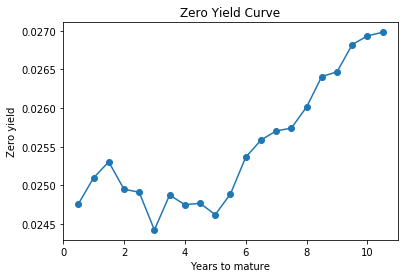

In [28]:
plt.plot(num_periods, annual_yield, "-o")
plt.xlabel("Years to mature")
plt.ylabel("Zero yield")
plt.title("Zero Yield Curve")
plt.show()

# Question 10 Bootstrap2

In [20]:
# Let us first split the data into two parts
bond_bootstrap2 = bond_data[["Maturity", "Coupon", "Price", "N"]].copy()
mask1 = bond_bootstrap2["Maturity"]<pd.to_datetime("2/15/2031")
mask2 = bond_bootstrap2["Maturity"]>pd.to_datetime("2/15/2038")

bootstrap_first = bond_bootstrap2[mask1].copy()
bootstrap_second = bond_bootstrap2[mask2].copy()

bootstrap_second = bootstrap_second.reset_index(drop = True)
bootstrap_second


Maturity   Coupon   Price     N
0  2039-02-15  0.03500  109.84  20.0
1  2039-08-15  0.04500  125.20  20.5
2  2040-02-15  0.04625  127.39  21.0
3  2040-08-15  0.03875  115.38  21.5
4  2041-02-15  0.04750  129.72  22.0
5  2041-08-15  0.03750  113.35  22.5
6  2042-02-15  0.03125  102.87  23.0
7  2042-08-15  0.02750   96.30  23.5
8  2043-02-15  0.03125  102.54  24.0
9  2043-08-15  0.03625  111.20  24.5
10 2044-02-15  0.03625  111.35  25.0
11 2044-08-15  0.03125  102.65  25.5
12 2045-02-15  0.02500   91.19  26.0
13 2045-08-15  0.02875   97.96  26.5
14 2046-02-15  0.02500   90.84  27.0
15 2046-08-15  0.02250   85.99  27.5
16 2047-02-15  0.03000  100.32  28.0
17 2047-08-15  0.02750   95.25  28.5
18 2048-02-15  0.03000   99.98  29.0
19 2048-08-15  0.03000   99.98  29.5

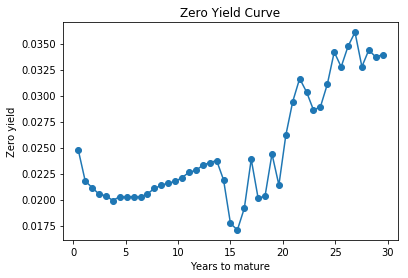

array([0.02475922, 0.02178907, 0.02114242, 0.020525  , 0.02035863,
       0.01990547, 0.02029006, 0.02022088, 0.02029319, 0.02023777,
       0.0205538 , 0.02106632, 0.02136965, 0.02158839, 0.02173937,
       0.02211574, 0.02261834, 0.02281176, 0.02329648, 0.02355508,
       0.02375386, 0.02189247, 0.01769647, 0.01707886, 0.01916016,
       0.02387706, 0.02012695, 0.02033988, 0.02439139, 0.02139652,
       0.02618385, 0.02942801, 0.03163917, 0.03035046, 0.02861841,
       0.02891416, 0.03109132, 0.03419655, 0.03276507, 0.03475003,
       0.03609841, 0.03278223, 0.03439356, 0.0337063 , 0.03395601])

In [43]:
# Let us first bootstrap the whole dataset.
bond_mat_whole = np.zeros((len(bond_data), len(bond_data)))

for i in range(len(bond_data)):
    # i ranges over each bond, represent i th column
    for j in range(i+1):
        # j ranges over each period, represent j th row
        
        # the ji spot of the matrix is the payment of the ith bond on the jth period
        # which is equal to coupon_rate / 2 * face_value, if principle is not repaid at this period
        bond_mat_whole[j][i] += bond_data["Coupon"][i]/2*100
        
        if j == i:
            # if principle is paid back at this period
            bond_mat_whole[j][i] += 100
 

#
p_vec_whole = np.array(bond_data["Price"])
q_vec_whole = p_vec_whole @ la.inv(bond_mat_whole)
num_periods_whole = np.linspace(0.5, 29.5, 45)
annual_yield_whole = (1/q_vec_whole - 1) / num_periods_whole
plt.plot(num_periods_whole, annual_yield_whole, "-o")
plt.xlabel("Years to mature")
plt.ylabel("Zero yield")
plt.title("Zero Yield Curve")
plt.show()
annual_yield_whole


Next we try to split the data into two parts.

In [22]:
bond_bootstrap2 = bond_data[["Maturity", "Coupon", "Price", "N"]].copy()
# select every row except for the four specified securities

# we should bootstrap the two parts of data separately 

# the first part of the data is before 2/15/2031, while the second part is after 2/15/2038

# boolean mask for the first part
mask1 = bond_bootstrap2["Maturity"]<pd.to_datetime("2/15/2031")
mask2 = bond_bootstrap2["Maturity"]>pd.to_datetime("2/15/2038")

bootstrap_first = bond_bootstrap2[mask1].copy()



'''
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2031")]
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2036")]
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2037")]
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2038")]
'''

# reset the index so no index is missing
#bond_bootstrap2 = bond_bootstrap2.reset_index(drop=True)
#bond_bootstrap2 


# bootstrap the first part
bond_mat_first = np.zeros((len(bond_bootstrap2[mask1]), len(bond_bootstrap2[mask1])))
for i in bond_bootstrap2[mask1].index:
    # i ranges over the bonds
    for j in range(i+1):
        # j ranges over each period, represent j th row
        
        # the ji spot of the matrix is the payment of the ith bond on the jth period
        # which is equal to coupon_rate / 2 * face_value, if principle is not repaid at this period
        bond_mat_first[j][i] += bond_bootstrap2[mask1]["Coupon"][i]/2*100
        
        if j == i:
            # if principle is paid back at this period
            bond_mat_first[j][i] += 100
pd.DataFrame(bond_mat_first)

0       1        2         3         4       5        6         7   \
0   104.0625    4.25    4.375    3.9375    4.0625    1.25    3.625    3.5625   
1     0.0000  104.25    4.375    3.9375    4.0625    1.25    3.625    3.5625   
2     0.0000    0.00  104.375    3.9375    4.0625    1.25    3.625    3.5625   
3     0.0000    0.00    0.000  103.9375    4.0625    1.25    3.625    3.5625   
4     0.0000    0.00    0.000    0.0000  104.0625    1.25    3.625    3.5625   
5     0.0000    0.00    0.000    0.0000    0.0000  101.25    3.625    3.5625   
6     0.0000    0.00    0.000    0.0000    0.0000    0.00  103.625    3.5625   
7     0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000  103.5625   
8     0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
9     0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
10    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
11    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
12    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
13    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
14    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
15    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
16    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
17    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
18    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
19    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   
20    0.0000    0.00    0.000    0.0000    0.0000    0.00    0.000    0.0000   

         8        9     ...           11        12     13       14        15  \
0     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
1     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
2     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
3     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
4     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
5     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
6     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
7     3.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
8   103.125    1.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
9     0.000  101.375    ...       3.8125    3.4375    3.0    3.375    3.3125   
10    0.000    0.000    ...       3.8125    3.4375    3.0    3.375    3.3125   
11    0.000    0.000    ...     103.8125    3.4375    3.0    3.375    3.3125   
12    0.000    0.000    ...       0.0000  103.4375    3.0    3.375    3.3125   
13    0.000    0.000    ...       0.0000    0.0000  103.0    3.375    3.3125   
14    0.000    0.000    ...       0.0000    0.0000    0.0  103.375    3.3125   
15    0.000    0.000    ...       0.0000    0.0000    0.0    0.000  103.3125   
16    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
17    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
18    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
19    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   
20    0.000    0.000    ...       0.0000    0.0000    0.0    0.000    0.0000   

          16       17      18       19        20  
0     3.1875    1.375    2.75    2.625    3.0625  
1     3.1875    1.375    2.75    2.625    3.0625  
2     3.1875    1.375    2.75    2.625    3.0625  
3     3.1875    1.375    2.75    2.625    3.0625  
4     3.1875    1.375    2.75    2.625    3.0625  
5     3.1875    1.375    2.75    2.625    3.0625  
6     3.1875    1.375    2.75    2.625    3.0625  
7     3.1875    1.375    2.75    2.625    3.0625  
8     3.1875    1.375    2.75

In [24]:
p_vec_first = np.array(bond_bootstrap2[mask1]["Price"])
q_vec_first = p_vec_first @ la.inv(bond_mat_first)

num_periods_first = np.array(bond_bootstrap2[mask1]["N"])
annual_yield_first = (1/q_vec_first - 1) / num_periods_first
annual_yield_first

array([0.02475922, 0.02525551, 0.02562718, 0.02542302, 0.02554082,
       0.02518344, 0.02582371, 0.02585056, 0.02603267, 0.02603313,
       0.02649912, 0.02721067, 0.02764606, 0.02796678, 0.0281953 ,
       0.02871277, 0.02939174, 0.02966681, 0.03031886, 0.03067514,
       0.03095199])

## The idea is that we try to do some extrapolation from the first half of data. Then based on the "extrapolated rates," we can keep bootstraping.

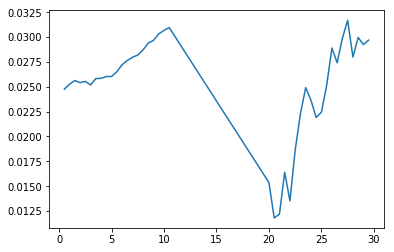

In [216]:
plt.plot(num_periods2, annual_yield2)

what should I do when the qi's for some payments are missing?